In [1]:
import numpy as np
import pandas as pd
xl = pd.ExcelFile("C:/Users/Lina/Desktop/Socio économique 03_20_2019 13_48_43.xlsx")
xl.sheet_names

['Tableau']

In [2]:
df = xl.parse("Tableau")

In [3]:
df=df.drop(['Unnamed: 1'],axis=1)

In [4]:
df_colums=np.array(df.columns)
df_colums_ln=len(df_colums)
reponces={}

for i in df_colums:
    reponces[i]=df[i].unique()

In [5]:
dtitle=pd.Series(['DATE',
       'Indices  des  prix  à  la  vente  industriel (IPVI) (2010 = 100)',
       'manufacturière',
       'agro-alimentaires',
       'viandes',
       'poisson',
       'fruits et légumes',
       'huiles et corps gras',
       'laitière',
       'Travail des grains, fabrication de produits amylacés',
       "Fabrication d'aliments pour animaux",
       'Autres industries alimentaires',
       'Industrie des boissons',
       'Industrie du tabac',
       'Matériaux de construction, céramique et verre',
       'Extraction de pierres',
       "Extraction de sables et d'argiles",
       "Fabrication de verre et d'articles en verre",
       'Fabrication de produits céramiques, autres que pour la construction',
       'Fabrication de carreaux en céramique',
       'Fabrication de tuiles et briques en terre cuite',
       'Fabrication de ciment, chaux et plâtre',
       "Fabrication d'ouvrages en béton ou en plâtre",
       'Travail de la pierre',
       'industries mécaniques et électriques',
       'Metallurgie',
       'Travail des metaux',
       'Fabrication de machines et equipements',
       'Fabrication de machines et appareils electriques',
       "Fabrication d'equipements de radio, television et communication",
       "Fabrication d'instruments medicaux, de precision, d'optique et d'horlogerie",
       'Industrie automobile',
       "Fabrication d'autres materiels de transport",
       'Chimie',
       'Industrie chimique de base',
       'Fabrication de peintures et vernis',
       'Industrie pharmaceutique',
       "Fabrication de savons, de parfums et de produits d'entretien",
       "Fabrication d'autres produits chimiques",
       'Industrie du caoutchouc',
       'Textile',
       'Industrie textile',
       "Industrie d'habillement et des fourrures",
       'Industrie du cuir et de la chaussure',
       'Industries divers',
       "Travail du bois et fabrication d'articles en bois",
       'Industrie du papier et du carton',
       'Edition, imprimerie, reproduction',
       'Transformation des matières plastiques',
       'Fabrication de meubles et industries diverses',
       'Mines',
       "Extraction de minéraux pour l'industrie chimique et d'engrais naturels",
       'Production de sel',
       'Energie',
       "Extraction d'hydrocarbures",
       'Raffinage de pétrole',
       "Production et distribution d'électricité",
       "Captage, traitement et distribution d'eau",
       "Indice d'ensemble pour les prix de la vente industriel (IPVI) (2010 = 100)"])

In [6]:
df['Socio économique\n\nTunisie; Unité']=dtitle

In [7]:
df.rename(columns = {'Socio économique\n\nTunisie; Unité':'INDICES'}, inplace = True)

In [8]:
df.set_index('INDICES', inplace=True)

In [10]:
dataset=pd.DataFrame()
dataset["Date"]=df.iloc[0, :]
dataset['Indices  des  prix  à  la  vente  industriel (IPVI)']=df.iloc[1, :]

In [12]:
for count, dte in enumerate(dataset["Date"]):
    
    if dte[0:3]=='Jan':
        dataset["Date"][count]=dte.replace('Jan ','-01-01')  
    elif dte[0:3]=='Fév':
        dataset["Date"][count]=dte.replace('Fév ','-02-01')
    elif dte[0:3]=='Mar':   
        dataset["Date"][count]=dte.replace('Mar ','-03-01')
    elif dte[0:3]=='Avr':    
        dataset["Date"][count]=dte.replace('Avr ','-04-01')
    elif dte[0:3]=='Mai': 
        dataset["Date"][count]=dte.replace('Mai ','-05-01')
    elif dte[0:3]=='Jui': 
        dataset["Date"][count]=dte.replace('Jui ','-06-01')
    elif dte[0:3]=='Jul':   
        dataset["Date"][count]=dte.replace('Jul ','-07-01')
    elif dte[0:3]=='Aoû':   
        dataset["Date"][count]=dte.replace('Aoû ','-08-01')
    elif dte[0:3]=='Sep':   
        dataset["Date"][count]=dte.replace('Sep ','-09-01')
    elif dte[0:3]=='Oct':  
        dataset["Date"][count]=dte.replace('Oct ','-10-01')
    elif dte[0:3]=='Nov':   
        dataset["Date"][count]=dte.replace('Nov ','-11-01')
    elif dte[0:3]=='Déc': 
        dataset["Date"][count]=dte.replace('Déc ','-12-01')

In [13]:
for count, dte in enumerate(dataset["Date"]):
    dataset["Date"][count]=dte[6:]+  dte[0:6]

In [14]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']= 10, 6
from datetime import datetime

dataset['Date']=pd.to_datetime(dataset['Date'], infer_datetime_format=True)
indexedDataset = dataset.set_index(['Date'])

In [15]:
rolmean = indexedDataset.rolling(window = 12).mean()
rolstd = indexedDataset.rolling(window = 12).std()

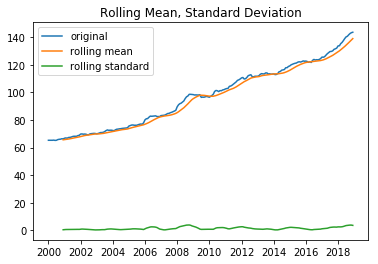

In [16]:
orig =plt.plot(indexedDataset, label='original')
mean =plt.plot(rolmean, label='rolling mean')
std =plt.plot(rolstd, label='rolling standard')
plt.legend(loc='best')
plt.title('Rolling Mean, Standard Deviation')
plt.show(block=False)

In [17]:
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test:')
dftest= adfuller(indexedDataset['Indices  des  prix  à  la  vente  industriel (IPVI)'], autolag='AIC')
dfoutput= pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags used','Number of observation used'])

for key, value in dftest[4].items():
    dfoutput['Critical value (%s)'%key]=value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  2.032863
p-value                         0.998714
#Lags used                      1.000000
Number of observation used    226.000000
Critical value (1%)            -3.459620
Critical value (5%)            -2.874415
Critical value (10%)           -2.573632
dtype: float64


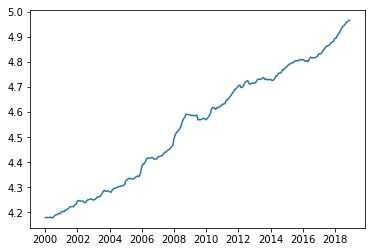

In [18]:
indexedDataset_logScale=indexedDataset
indexedDataset_logScale[indexedDataset_logScale.columns[0]]=np.log(np.array(indexedDataset[indexedDataset.columns[0]].values).astype(np.float64))
plt.plot(indexedDataset_logScale)

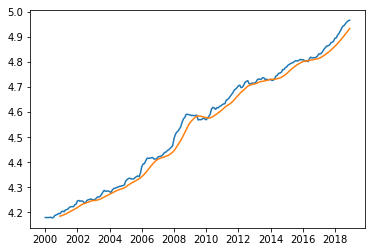

In [19]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movinSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage)

In [20]:
datasetLogScaleMinusMovingAverage =  indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,Indices des prix à la vente industriel (IPVI)
Date,
2000-12-01,0.010001
2001-01-01,0.015621
2001-02-01,0.016469
2001-03-01,0.011587
2001-04-01,0.016530
2001-05-01,0.015505
2001-06-01,0.015455
2001-07-01,0.017979
2001-08-01,0.017930


In [21]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    orig = plt.plot(timeseries, label='Original')
    mean = plt.plot(movingAverage, label='Rolling Mean')
    std = plt.plot(movingSTD, label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    
    dftest= adfuller(timeseries['Indices  des  prix  à  la  vente  industriel (IPVI)'], autolag='AIC')
    dfoutput= pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags used','Number of observation used'])

    for key, value in dftest[4].items():
        dfoutput['Critical value (%s)'%key]=value
    print(dfoutput)

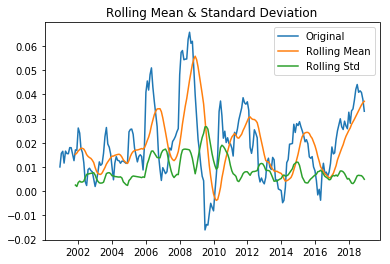

Test Statistic                 -3.664855
p-value                         0.004636
#Lags used                      1.000000
Number of observation used    215.000000
Critical value (1%)            -3.461136
Critical value (5%)            -2.875079
Critical value (10%)           -2.573986
dtype: float64


In [22]:
test_stationarity(datasetLogScaleMinusMovingAverage)

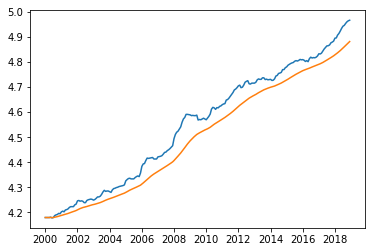

In [23]:
exponentialDecayweightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayweightedAverage)

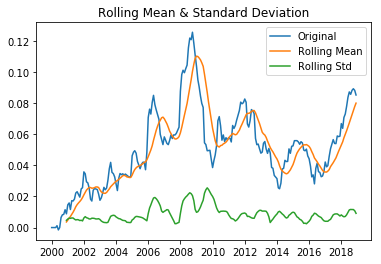

Test Statistic                 -2.370925
p-value                         0.150111
#Lags used                      1.000000
Number of observation used    226.000000
Critical value (1%)            -3.459620
Critical value (5%)            -2.874415
Critical value (10%)           -2.573632
dtype: float64


In [24]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayweightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

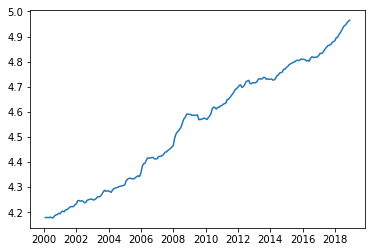

In [25]:
datasetLogDiffShifling= indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifling)

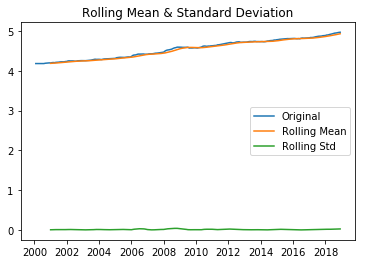

Test Statistic                  0.489255
p-value                         0.984543
#Lags used                      1.000000
Number of observation used    225.000000
Critical value (1%)            -3.459752
Critical value (5%)            -2.874473
Critical value (10%)           -2.573663
dtype: float64


In [26]:
datasetLogDiffShifling.dropna(inplace=True)
test_stationarity(datasetLogDiffShifling)

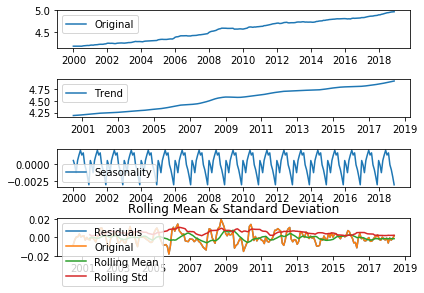

Test Statistic               -8.054408e+00
p-value                       1.707788e-12
#Lags used                    1.000000e+00
Number of observation used    2.140000e+02
Critical value (1%)          -3.461282e+00
Critical value (5%)          -2.875143e+00
Critical value (10%)         -2.574020e+00
dtype: float64


In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

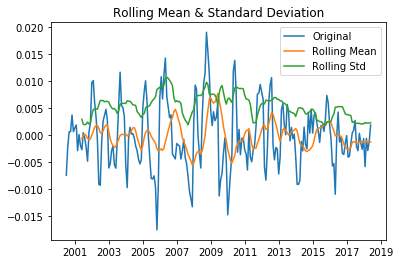

Test Statistic               -8.054408e+00
p-value                       1.707788e-12
#Lags used                    1.000000e+00
Number of observation used    2.140000e+02
Critical value (1%)          -3.461282e+00
Critical value (5%)          -2.875143e+00
Critical value (10%)         -2.574020e+00
dtype: float64


In [28]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

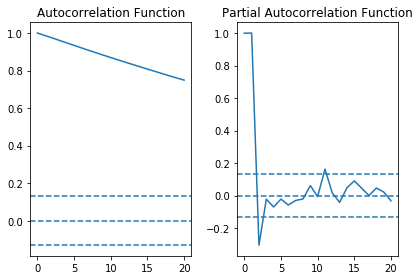

In [29]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifling, nlags=20)
lag_pacf = pacf(datasetLogDiffShifling, nlags=20, method='ols')

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifling)), linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifling)), linestyle='--')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifling)), linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifling)), linestyle='--')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting ARIMA model


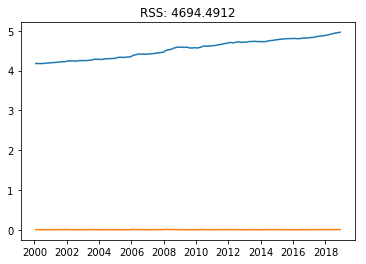

In [31]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(indexedDataset_logScale, order=(2,1,2))
results_ARIMA = model.fit(disp= -1)
plt.plot(datasetLogDiffShifling)
plt.plot(results_AR.fittedvalues)
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifling['Indices  des  prix  à  la  vente  industriel (IPVI)'])**2))
print('Plotting ARIMA model')

In [32]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
2000-02-01    0.003453
2000-03-01    0.002410
2000-04-01    0.002298
2000-05-01    0.002122
2000-06-01    0.002609
dtype: float64


In [33]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
2000-02-01    0.003453
2000-03-01    0.005863
2000-04-01    0.008161
2000-05-01    0.010283
2000-06-01    0.012892
dtype: float64


In [34]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['Indices  des  prix  à  la  vente  industriel (IPVI)'].ix[0], index= indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value= 0)
predictions_ARIMA_log.head()

c:\users\lina\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Date
2000-01-01    4.178992
2000-02-01    4.182445
2000-03-01    4.184855
2000-04-01    4.187153
2000-05-01    4.189275
dtype: float64

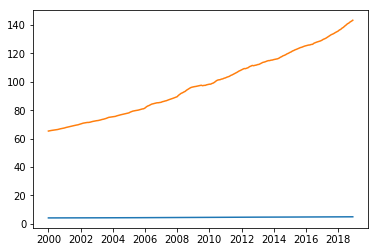

In [35]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

In [36]:
indexedDataset_logScale.head()

,Indices des prix à la vente industriel (IPVI)
Date,
2000-01-01,4.178992
2000-02-01,4.178992
2000-03-01,4.178992
2000-04-01,4.178992
2000-05-01,4.180522


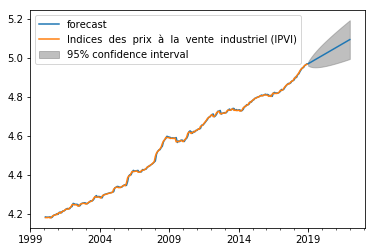

In [62]:
results_ARIMA.plot_predict(1,264)
x= results_ARIMA.forecast(steps=120)

In [39]:
x[1]

array([0.00522392, 0.0085318 , 0.01121178, 0.01372584, 0.0159092 ,
       0.01796135, 0.01980208, 0.02154262, 0.02314141, 0.02466387,
       0.02608718, 0.02745106, 0.02874267, 0.02998676, 0.0311761 ,
       0.03232648, 0.03343393, 0.03450878, 0.03554897, 0.0365614 ,
       0.03754513, 0.03850489, 0.0394404 , 0.04035496, 0.04124867,
       0.04212389, 0.04298091, 0.04382148, 0.04464599, 0.04545574,
       0.04625115, 0.04703325, 0.04780244, 0.04855954, 0.04930495,
       0.0500393 , 0.05076299, 0.05147655, 0.05218032, 0.05287474,
       0.05356014, 0.0542369 , 0.05490531, 0.05556568, 0.05621829,
       0.05686342, 0.0575013 , 0.05813219, 0.0587563 , 0.05937386,
       0.05998505, 0.06059008, 0.06118913, 0.06178237, 0.06236997,
       0.06295209, 0.06352887, 0.06410046, 0.064667  , 0.06522861,
       0.06578544, 0.06633759, 0.06688518, 0.06742833, 0.06796713,
       0.0685017 , 0.06903212, 0.06955851, 0.07008094, 0.0705995 ,
       0.07111428, 0.07162536, 0.07213283, 0.07263674, 0.07313

In [40]:
len(x[1])

120

In [45]:
np.exp(x[1])

array([1.00523758, 1.0085683 , 1.01127487, 1.01382047, 1.01603642,
       1.01812363, 1.01999944, 1.02177634, 1.02341125, 1.02497054,
       1.02643043, 1.02783131, 1.02915973, 1.03044089, 1.03166716,
       1.03285465, 1.03399913, 1.03511112, 1.03618839, 1.03723799,
       1.03825886, 1.03925581, 1.0402285 , 1.04118029, 1.04211121,
       1.04302369, 1.04391797, 1.04479582, 1.04565762, 1.04650468,
       1.04733742, 1.04815686, 1.0489634 , 1.04975787, 1.05054066,
       1.05131241, 1.05207352, 1.05282449, 1.0535657 , 1.05429758,
       1.05502044, 1.05573468, 1.05644057, 1.05713845, 1.05782857,
       1.05851123, 1.05918665, 1.05985509, 1.06051676, 1.06117189,
       1.06182067, 1.0624633 , 1.06309996, 1.06373082, 1.06435605,
       1.06497581, 1.06559025, 1.0661995 , 1.06680372, 1.06740302,
       1.06799754, 1.0685874 , 1.06917271, 1.06975358, 1.07033013,
       1.07090244, 1.07147063, 1.07203478, 1.07259499, 1.07315134,
       1.07370392, 1.07425282, 1.0747981 , 1.07533984, 1.07587

In [50]:
df.head()

,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,...,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,Unnamed: 225,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229
INDICES,,,,,,,,,,,,,,,,,,,,,
DATE,Jan 2000,Fév 2000,Mar 2000,Avr 2000,Mai 2000,Jui 2000,Jul 2000,Aoû 2000,Sep 2000,Oct 2000,...,Mar 2018,Avr 2018,Mai 2018,Jui 2018,Jul 2018,Aoû 2018,Sep 2018,Oct 2018,Nov 2018,Déc 2018
Indices des prix à la vente industriel (IPVI) (2010 = 100),65.3,65.3,65.3,65.3,65.4,65.2,65.3,65.8,66,66.1,...,135.3,136.2,137.5,139,140.2,140.7,141.8,142.7,143.3,143.6
manufacturière,71.8,71.7,71.7,71.7,71.7,71.7,71.7,71.9,72.1,72.3,...,133.8,134.8,136.1,137.6,139,139.4,140,141,141.4,141.6
agro-alimentaires,68.7,68.8,68.7,68.5,68.3,68.1,68.2,69.2,69.3,69.3,...,141.7,144,144,145.3,144.8,145.1,145.3,146.4,146.7,147.8
viandes,70.8,72.4,71.8,70.8,69.9,68.9,69.5,70.6,71.2,71.2,...,172.7,181.8,180.4,185,179.1,179.3,176.7,180.2,178.8,182.2


In [52]:
dtitle.head()

0                                                 DATE
1    Indices  des  prix  à  la  vente  industriel (...
2                                       manufacturière
3                                    agro-alimentaires
4                                              viandes
dtype: object

In [58]:
dataset2 = dataset.set_index(['Date'])
for count, titl in enumerate(dtitle[2:]):
    print(df.iloc[count+2,:])
    #dataset2[titl]=df.iloc[count+2,:]

Unnamed: 2       71.8
Unnamed: 3       71.7
Unnamed: 4       71.7
Unnamed: 5       71.7
Unnamed: 6       71.7
Unnamed: 7       71.7
Unnamed: 8       71.7
Unnamed: 9       71.9
Unnamed: 10      72.1
Unnamed: 11      72.3
Unnamed: 12      72.6
Unnamed: 13      72.6
Unnamed: 14      73.1
Unnamed: 15      73.2
Unnamed: 16      73.5
Unnamed: 17      73.9
Unnamed: 18      74.1
Unnamed: 19      74.1
Unnamed: 20      74.4
Unnamed: 21      74.5
Unnamed: 22      74.5
Unnamed: 23      74.5
Unnamed: 24        75
Unnamed: 25        75
Unnamed: 26      75.5
Unnamed: 27      75.6
Unnamed: 28      75.5
Unnamed: 29      75.4
Unnamed: 30      75.4
Unnamed: 31      75.2
                ...  
Unnamed: 200    121.9
Unnamed: 201    121.2
Unnamed: 202    121.4
Unnamed: 203    121.2
Unnamed: 204    121.4
Unnamed: 205    121.9
Unnamed: 206      123
Unnamed: 207    123.1
Unnamed: 208    123.4
Unnamed: 209    124.5
Unnamed: 210    125.2
Unnamed: 211    126.3
Unnamed: 212    126.6
Unnamed: 213    126.8
Unnamed: 2

Name: Extraction de sables et d'argiles, Length: 228, dtype: object
Unnamed: 2       77.5
Unnamed: 3       76.6
Unnamed: 4       77.2
Unnamed: 5       77.2
Unnamed: 6       77.2
Unnamed: 7       77.2
Unnamed: 8       76.4
Unnamed: 9       82.5
Unnamed: 10      82.5
Unnamed: 11      82.3
Unnamed: 12      82.3
Unnamed: 13      82.3
Unnamed: 14      82.5
Unnamed: 15      82.5
Unnamed: 16      82.5
Unnamed: 17      82.5
Unnamed: 18      82.5
Unnamed: 19      82.5
Unnamed: 20      82.5
Unnamed: 21      82.5
Unnamed: 22      82.5
Unnamed: 23      79.8
Unnamed: 24      79.8
Unnamed: 25      79.8
Unnamed: 26      76.7
Unnamed: 27      77.6
Unnamed: 28      77.6
Unnamed: 29      77.6
Unnamed: 30      77.6
Unnamed: 31      77.6
                ...  
Unnamed: 200    121.2
Unnamed: 201    121.2
Unnamed: 202    121.7
Unnamed: 203    121.1
Unnamed: 204      121
Unnamed: 205      121
Unnamed: 206    122.3
Unnamed: 207      125
Unnamed: 208      127
Unnamed: 209    125.6
Unnamed: 210    125.6
Unnamed:

Name: Industrie automobile, Length: 228, dtype: object
Unnamed: 2       61.4
Unnamed: 3       61.4
Unnamed: 4       61.4
Unnamed: 5       61.4
Unnamed: 6       61.4
Unnamed: 7       61.4
Unnamed: 8       61.4
Unnamed: 9       61.4
Unnamed: 10      61.4
Unnamed: 11      61.4
Unnamed: 12      61.4
Unnamed: 13      61.4
Unnamed: 14      61.4
Unnamed: 15      61.4
Unnamed: 16      61.4
Unnamed: 17      61.4
Unnamed: 18      61.4
Unnamed: 19      61.4
Unnamed: 20      61.4
Unnamed: 21      61.4
Unnamed: 22      61.4
Unnamed: 23      61.4
Unnamed: 24      61.4
Unnamed: 25      61.4
Unnamed: 26      61.4
Unnamed: 27      61.4
Unnamed: 28      61.4
Unnamed: 29      61.4
Unnamed: 30      61.4
Unnamed: 31      68.3
                ...  
Unnamed: 200    138.4
Unnamed: 201    138.4
Unnamed: 202    138.4
Unnamed: 203    148.5
Unnamed: 204    148.5
Unnamed: 205    148.5
Unnamed: 206    148.5
Unnamed: 207    148.5
Unnamed: 208      153
Unnamed: 209      153
Unnamed: 210      153
Unnamed: 211      153

Name: Captage, traitement et distribution d'eau, Length: 228, dtype: object
Unnamed: 2       65.3
Unnamed: 3       65.3
Unnamed: 4       65.3
Unnamed: 5       65.3
Unnamed: 6       65.4
Unnamed: 7       65.2
Unnamed: 8       65.3
Unnamed: 9       65.8
Unnamed: 10        66
Unnamed: 11      66.1
Unnamed: 12      66.4
Unnamed: 13      66.3
Unnamed: 14      66.8
Unnamed: 15        67
Unnamed: 16      66.8
Unnamed: 17      67.3
Unnamed: 18      67.4
Unnamed: 19      67.6
Unnamed: 20        68
Unnamed: 21      68.2
Unnamed: 22      68.2
Unnamed: 23      68.2
Unnamed: 24      68.7
Unnamed: 25      68.9
Unnamed: 26      69.8
Unnamed: 27      69.9
Unnamed: 28      69.7
Unnamed: 29      69.8
Unnamed: 30      69.7
Unnamed: 31      69.3
                ...  
Unnamed: 200    123.9
Unnamed: 201    123.5
Unnamed: 202    123.7
Unnamed: 203    123.6
Unnamed: 204    123.9
Unnamed: 205    124.5
Unnamed: 206    125.6
Unnamed: 207    125.5
Unnamed: 208    125.9
Unnamed: 209      127
Unnamed: 210      128


In [56]:
dataset2.head()

,Indices des prix à la vente industriel (IPVI),manufacturière,agro-alimentaires,viandes,poisson,fruits et légumes,huiles et corps gras,laitière,"Travail des grains, fabrication de produits amylacés",Fabrication d'aliments pour animaux,...,Fabrication de meubles et industries diverses,Mines,Extraction de minéraux pour l'industrie chimique et d'engrais naturels,Production de sel,Energie,Extraction d'hydrocarbures,Raffinage de pétrole,Production et distribution d'électricité,"Captage, traitement et distribution d'eau",Indice d'ensemble pour les prix de la vente industriel (IPVI) (2010 = 100)
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,65.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-01,65.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-01,65.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-01,65.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-01,65.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
dataset2.head()

,Indices des prix à la vente industriel (IPVI),manufacturière,agro-alimentaires,viandes,poisson,fruits et légumes,huiles et corps gras,laitière,"Travail des grains, fabrication de produits amylacés",Fabrication d'aliments pour animaux,...,Fabrication de meubles et industries diverses,Mines,Extraction de minéraux pour l'industrie chimique et d'engrais naturels,Production de sel,Energie,Extraction d'hydrocarbures,Raffinage de pétrole,Production et distribution d'électricité,"Captage, traitement et distribution d'eau",Indice d'ensemble pour les prix de la vente industriel (IPVI) (2010 = 100)
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,65.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-01,65.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-01,65.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-01,65.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-01,65.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
